### Problem statement

World health organization has estimated that four out of five cardiovascular disease death due to heart attacks

this whole reasearch pinpoint out the who are likely to get disease in by using TenYearCHD

### Import the library

In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [75]:
dataset = pd.read_csv(r"C:\Users\jagan\Documents\ML\datasets\5. heart disease prediction\framingham.csv")

In [76]:
dataset.drop('education', axis=1, inplace=  True)

In [77]:
dataset

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [78]:
# removing the null values

dataset.dropna(axis=0, inplace = True)

In [79]:
dataset.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [80]:
dataset.shape

(3751, 15)

In [81]:
# we have 10 year CHD datasets

C:\Users\jagan\AppData\Local\Temp\ipykernel_33676\4016630164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'TenYearCHD', data = dataset, palette = 'BuGn_r')


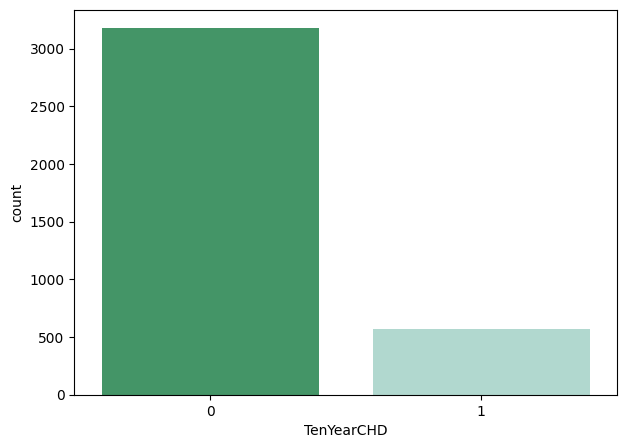

In [82]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'TenYearCHD', data = dataset, palette = 'BuGn_r')
plt.show()

**the above bar plot will show to us. how many people are afftected by the CH disease.** 

**0 means not afftected by CHD, 1 means affected by CHD**

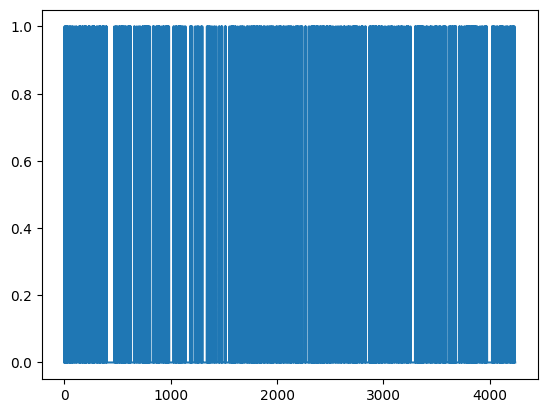

In [83]:
laste = dataset['TenYearCHD'].plot()
plt.show(laste)

### Preprocessing Phase

In [84]:
dataset.rename(columns= {'male':'sex_male'}, inplace= True)

In [85]:
dataset.columns

Index(['sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [86]:
X = dataset[['age','sex_male','cigsPerDay','totChol','sysBP','glucose']].values
y = dataset[['TenYearCHD']].values

In [87]:
X[:5]

array([[ 39. ,   1. ,   0. , 195. , 106. ,  77. ],
       [ 46. ,   0. ,   0. , 250. , 121. ,  76. ],
       [ 48. ,   1. ,  20. , 245. , 127.5,  70. ],
       [ 61. ,   0. ,  30. , 225. , 150. , 103. ],
       [ 46. ,   0. ,  23. , 285. , 130. ,  85. ]])

In [88]:
X.shape

(3751, 6)

In [89]:
y[:5]

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [90]:
# we have to normalize the dataset

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [91]:
### Splitting dataset into train set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [92]:
X_train

array([[-0.65041507,  1.11629198, -0.75552698, -0.4691787 , -0.85596042,
        -0.20436458],
       [-1.3506084 ,  1.11629198, -0.75552698,  2.04171417, -0.37963134,
        -0.53938629],
       [ 1.10006824,  1.11629198, -0.75552698, -0.17773578, -1.4457012 ,
        -0.03685373],
       ...,
       [-0.18361952,  1.11629198, -0.75552698,  0.58449956, -0.83327809,
        -0.20436458],
       [-0.88381285,  1.11629198,  0.9218319 , -0.4691787 , -0.33426666,
        -1.04191885],
       [-0.76711396,  1.11629198, -0.75552698,  0.09128846,  0.0059684 ,
         0.0469017 ]])

In [93]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [94]:
X_test

array([[ 1.80026157, -0.89582297, -0.75552698, -0.35708527,  0.39156814,
         0.46567883],
       [-1.23390951, -0.89582297, -0.75552698, -0.80545899, -0.51572536,
         0.34004569],
       [-1.81740395, -0.89582297, -0.75552698, -1.50043827, -0.51572536,
         0.0469017 ],
       ...,
       [ 1.33346602, -0.89582297, -0.67165903,  1.9968768 ,  3.06808396,
        -0.16248687],
       [ 0.74997158, -0.89582297, -0.75552698,  1.12254803,  1.66177903,
         0.0469017 ],
       [-0.76711396, -0.89582297,  0.9218319 ,  0.62933693, -1.15083081,
         0.54943426]])

In [95]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [96]:
X_train.shape, y_train.shape

((2625, 6), (2625, 1))

In [97]:
X_test.shape, y_test.shape

((1126, 6), (1126, 1))

In [98]:
### Train the model with Logistic Regression

from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(X_train, y_train)

c:\users\jagan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [99]:
### Predict the model accuracy

from sklearn.metrics import jaccard_score

y_pred = regression.predict(X_test)

score = jaccard_score(y_test, y_pred)
score

0.07608695652173914

In [101]:
### Train the model with RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

c:\users\jagan\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [104]:
y_pred_rf = classifier.predict(X_test)
score = jaccard_score(y_test, y_pred_rf)
score*100

9.183673469387756

In [105]:
classifier.score(X_test, y_test) * 100

84.19182948490231

In [ ]:
### Using the confusion matrix to find the accuracy of the model

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])

plt.figure(figsize=(8,5))
sns.heatmap(data = conf_matrix, annot=  True, fmt = 'd', cmap = 'Greens')
plt.show()
print("-*-"*14)
print('The Details for the confusion matrix ')
print(classification_report(y_test, y_pred_rf))